In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


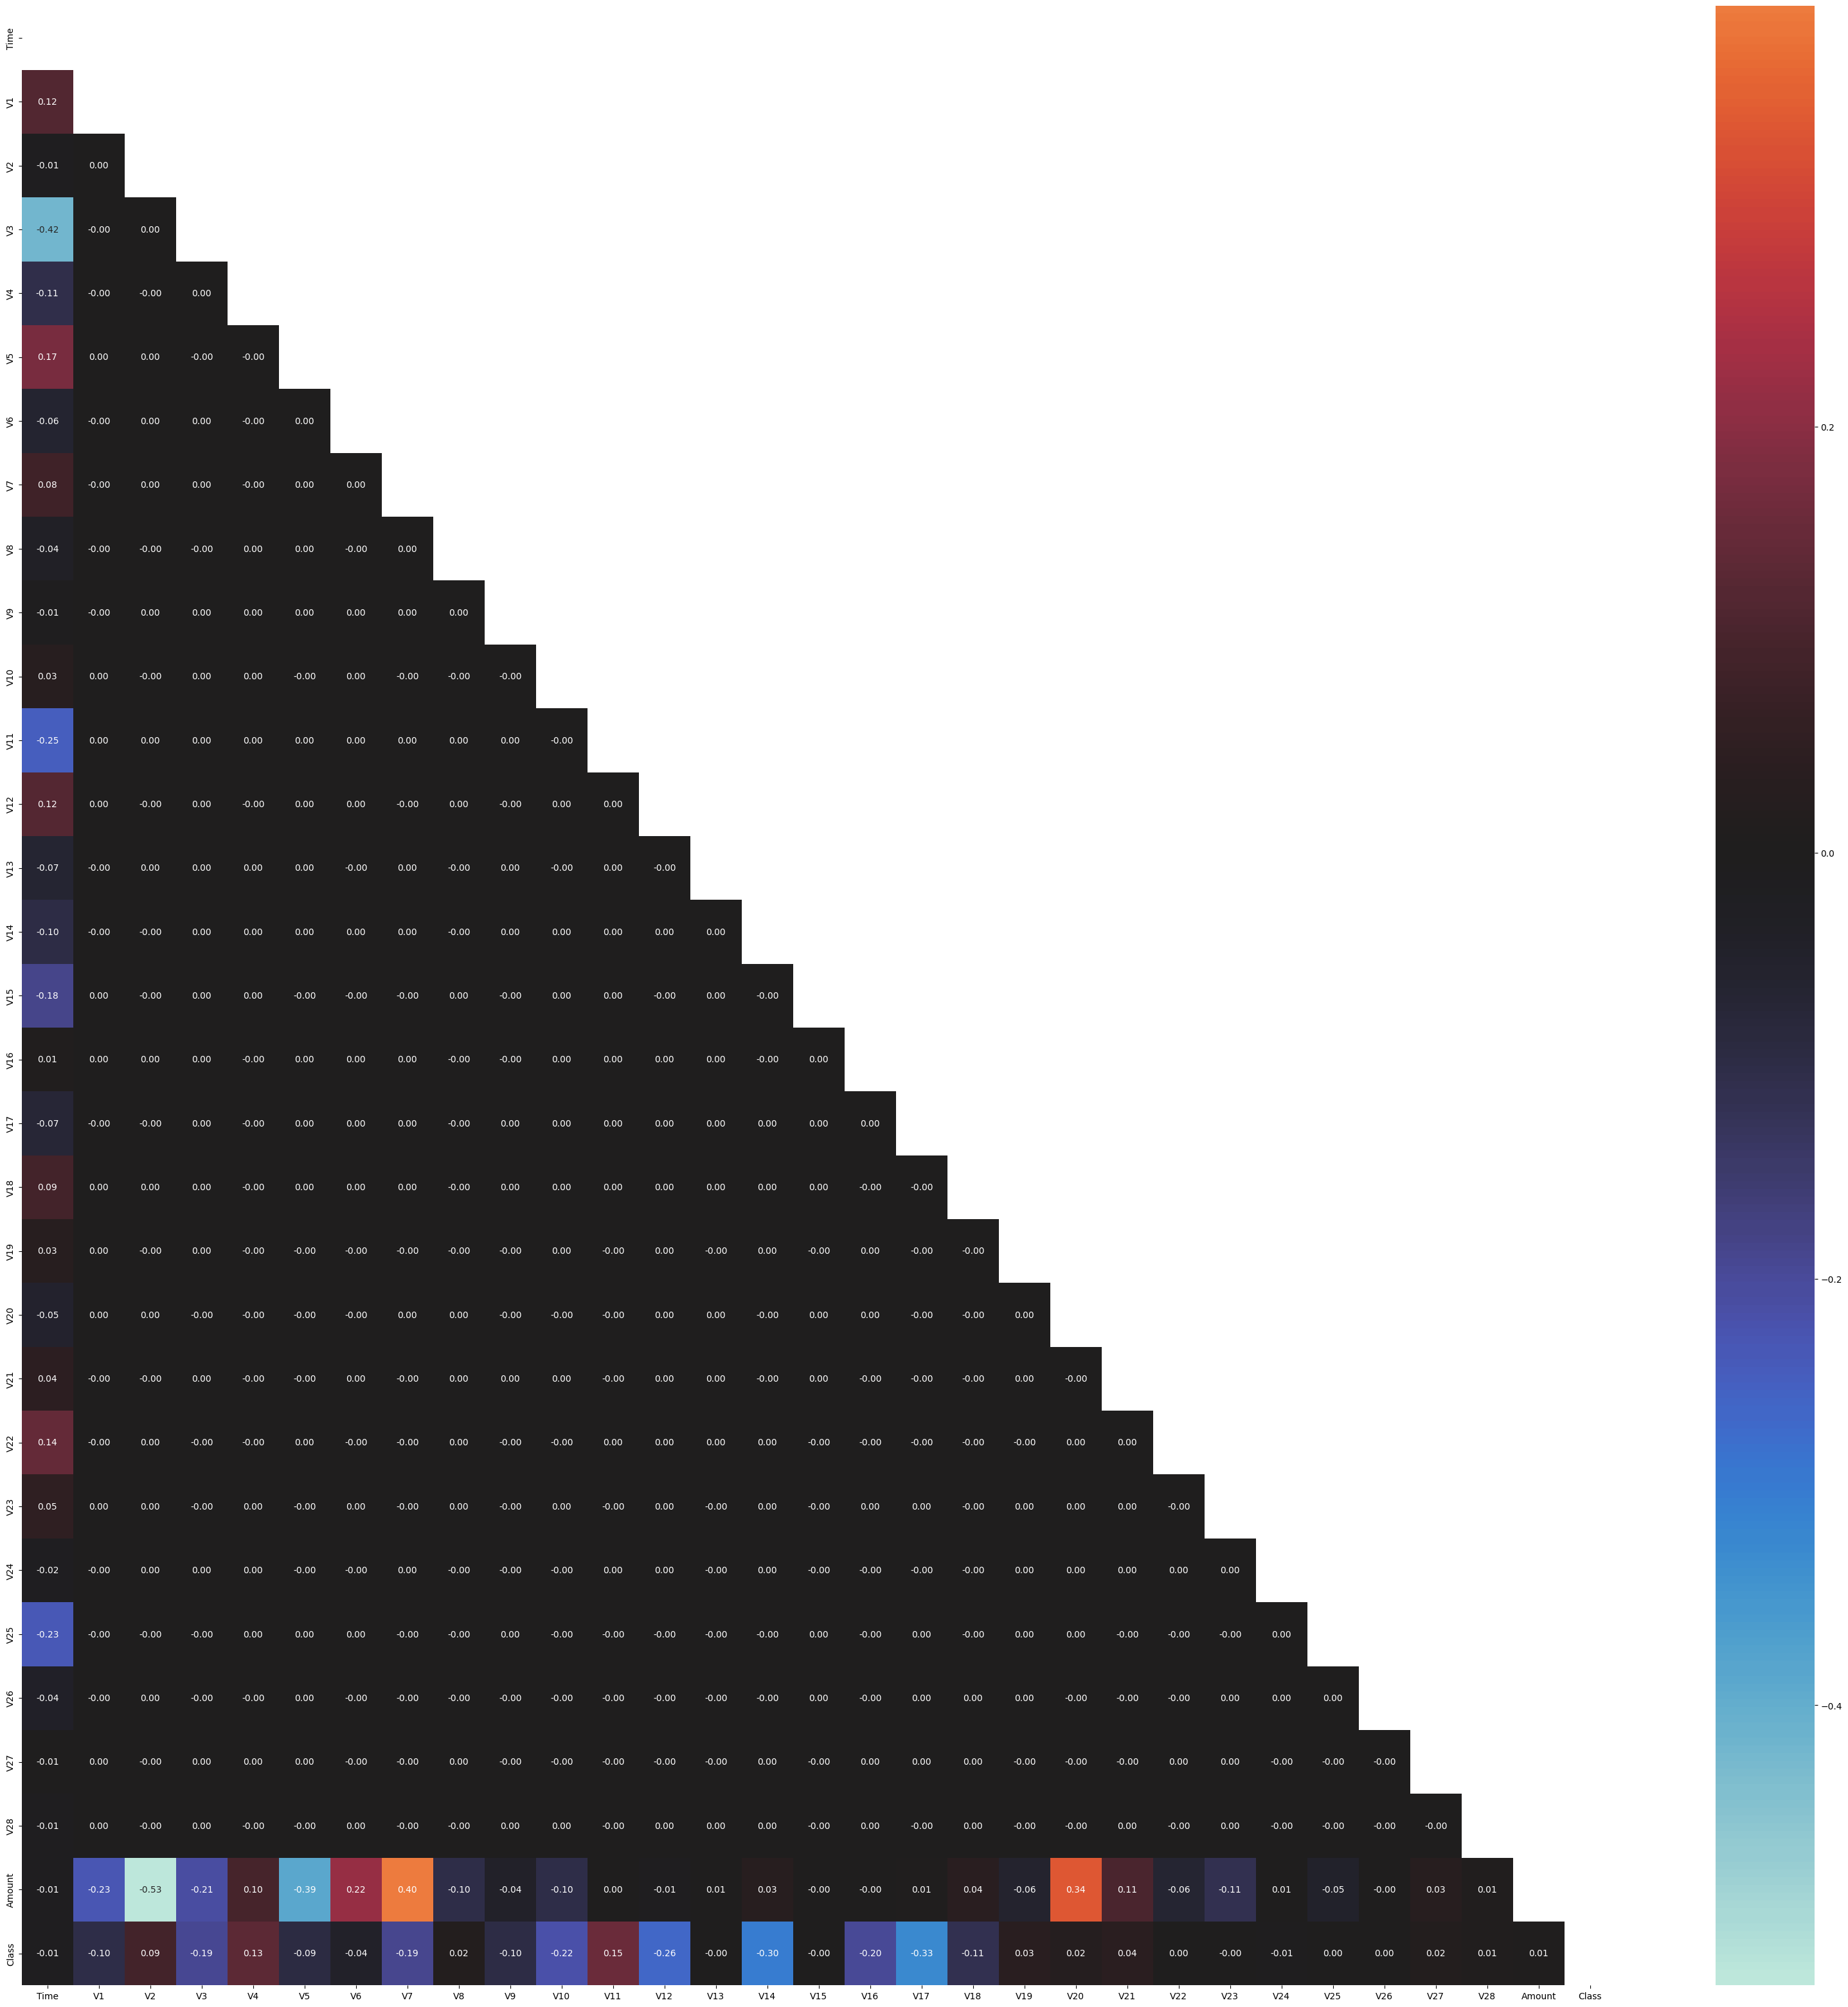

In [5]:
plt.figure(figsize=(40, 40))

corr_matrix = data.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))

sns.heatmap(lower, annot=True, fmt='.2f', cbar=True, center=0);

Убираем компоненты с малой корреляцией с меткой Class

In [6]:
for not_used_comp in range(19, 29):
    data = data.drop([f'V{not_used_comp}'], axis=1)
data = data.drop(['Time', 'Amount'], axis=1)

Вырезаем часть данных, потому что не хватает памяти на device

In [7]:
no_fraud = data[data['Class'] == 0]
no_fraud = no_fraud.sample(frac=1, random_state=RANDOM_SEED)
no_fraud = no_fraud[0:len(no_fraud) // 30]
fraud = data[data['Class'] > 0]

In [8]:
data = pd.concat([no_fraud, fraud], ignore_index=True)

In [9]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,Class
0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,-0.597739,-0.325347,-0.216435,0.084204,-1.054631,0.967932,0.601226,0.631117,0.295078,0
1,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,0.170547,0.821998,0.468322,-0.057550,0.573006,0.358688,-0.011633,-0.504570,0.722750,0
2,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,2.051312,0.575866,-0.594037,1.097880,-0.338340,0.617523,-0.756390,0.535141,1.016704,0
3,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,-1.238598,-0.841133,-0.586472,-0.779620,-0.436671,0.747871,0.266437,0.703234,0.916719,0
4,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,1.166335,1.297531,-1.920966,1.885047,1.323225,-2.044482,1.317655,-0.441076,0.804104,0


Соотношение целевой переменной Class

In [10]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100, 3), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100, 3), '% of the dataset')

No Frauds 95.065 % of the dataset
Frauds 4.935 % of the dataset


## Preporcessing

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y = data['Class']
data = data.drop(['Class'], axis=1)
X = scaler.fit_transform(data)


In [12]:
def plots_of_cluster(X_tsne, X_umap, title=None, hue=None):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=hue, palette='rainbow', s=15)
    plt.title('TSNE')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=hue, palette='rainbow', s=15)
    plt.title('UMAP')

    plt.suptitle(title)

    plt.tight_layout()
    plt.show()

In [13]:
def calc_anomalies(list_with_anomalies):
    print('Количество выбросов в выборке для сигм: {}'.format(sum(list_with_anomalies)))
    print('Процент выбросов в выборке: {:.2%}'.format(sum(list_with_anomalies)/len(X)))

## 3 сигма

In [14]:
up_bound = X.mean(axis=0) + 3 * X.std(axis=0)
low_bound = X.mean(axis=0) - 3 * X.std(axis=0)
sigma_outliers = np.where((X < low_bound) | (X > up_bound), 1, 0).sum(axis=1) > 0

In [15]:
calc_anomalies(sigma_outliers)

Количество выбросов в выборке для сигм: 731
Процент выбросов в выборке: 7.33%


## Межквартильное отклонение

In [16]:
data_anom = pd.DataFrame(columns = data.columns)
threshold = 1.5
for col in data.columns:
  IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
  up_bound = data[col].quantile(0.75) + (IQR * threshold)
  low_bound = data[col].quantile(0.25) - (IQR * threshold)
  data_anom[col] = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).sum(axis=1) >= 1

box_outliers = data_anom.sum(axis=1) > 0

In [17]:
calc_anomalies(box_outliers)

Количество выбросов в выборке для сигм: 3219
Процент выбросов в выборке: 32.29%


# Кластеризация

## Hierarhical

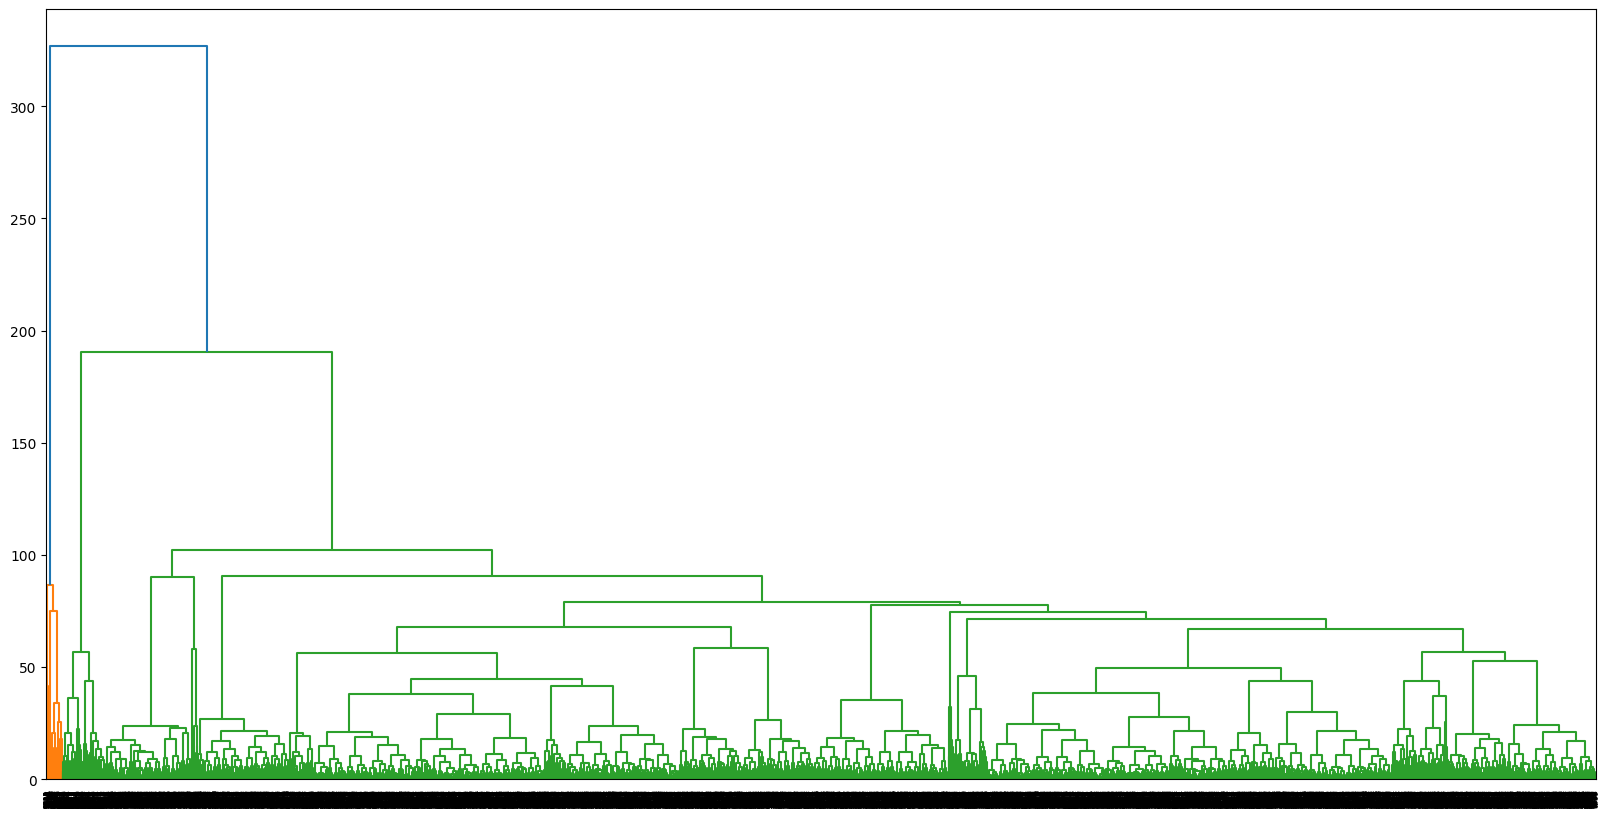

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20,10))

linkage_ = linkage(X, method='ward')
dendrogram_ = dendrogram(linkage_)

plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2 , linkage='ward')
cluster.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
hier_outliers = np.array([1 if label == np.argmin(np.unique(cluster.labels_, return_counts= True)[1])
                            else 0 for label in cluster.labels_])

In [21]:
calc_anomalies(hier_outliers)

Количество выбросов в выборке для сигм: 107
Процент выбросов в выборке: 1.07%


## Distance-based

In [22]:
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist

class DistanceOutliers(BaseEstimator):
    """
    Parameters:
    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)
    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile

    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)

    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

In [23]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=95)
euclidian_model.fit(pd.DataFrame(X))
euclidian_outliers = euclidian_model.predict(pd.DataFrame(X))

In [24]:
calc_anomalies(euclidian_outliers)

Количество выбросов в выборке для сигм: 499
Процент выбросов в выборке: 5.01%


## DBSCAN

In [25]:
from sklearn.cluster import DBSCAN

# для начала считаем все наблюдения аномальными
outlier_percentage = 1.

num_clusters = []
anomaly_percentage = []

# берем маленький эпсилон и начинаем увеличивать
eps = 0.03
eps_history = [eps]
while outlier_percentage>0.1:
    model = DBSCAN(eps=eps).fit(X)
    labels = model.labels_
    num_clusters.append(len(np.unique(labels))-1)
    labels = np.array([1 if label == -1 else 0 for label in labels])
    # считаем текущий процент "шума"
    outlier_percentage = sum(labels==1) / len(labels)
    eps += 0.05
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)

model = DBSCAN(eps)
model.fit(X)
density_outliers = np.array([1 if label == -1 else 0 for label in model.labels_])

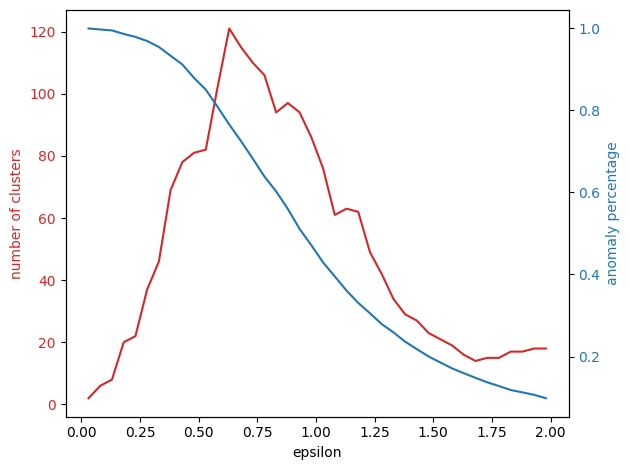

In [26]:
iterations = eps_history[:-1]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epsilon')
ax1.set_ylabel('number of clusters', color=color)
ax1.plot(iterations, num_clusters, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('anomaly percentage', color=color)
ax2.plot(iterations, anomaly_percentage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [27]:
calc_anomalies(density_outliers)

Количество выбросов в выборке для сигм: 908
Процент выбросов в выборке: 9.11%


# Unsupervised model-based

## One-Class SVM (Support Vector Machine )

In [28]:
from sklearn.svm import OneClassSVM

one_class_svm = OneClassSVM(nu=0.05, gamma='auto') # nu - Верхняя граница доли ошибок обучения и нижняя граница доли опорных векторов.
one_class_svm.fit(X)
svm_outliers = one_class_svm.predict(X)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

In [29]:
calc_anomalies(svm_outliers)

Количество выбросов в выборке для сигм: 498
Процент выбросов в выборке: 5.00%


## Isolation Forest

In [30]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination=0.05,
                                   max_features=1.0, bootstrap=True)
isolation_forest.fit(X)

isolation_outliers = isolation_forest.predict(X)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

In [31]:
calc_anomalies(isolation_outliers)

Количество выбросов в выборке для сигм: 499
Процент выбросов в выборке: 5.01%


In [32]:
names = [
    '3 сигма',
    'межквартильный размах',
    'hierarhical',
    'distance-based',
    'dbscan',
    'one-class svm',
    'isolation forest'
]

labels = [
    sigma_outliers,
    box_outliers,
    hier_outliers,
    euclidian_outliers,
    density_outliers,
    svm_outliers,
    isolation_outliers
]

## Classification report для всех моделей

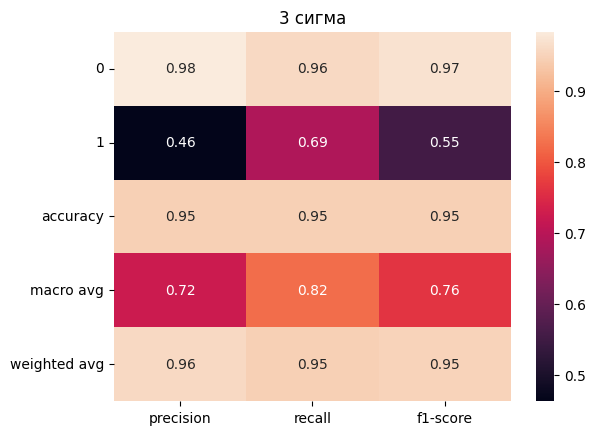

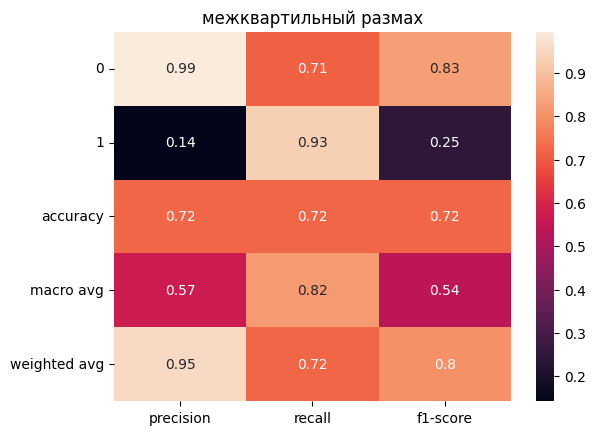

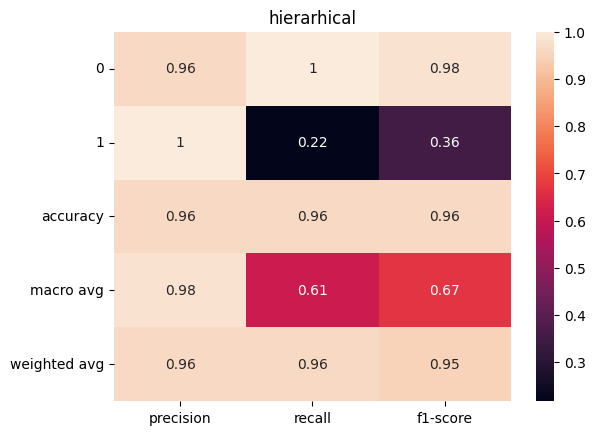

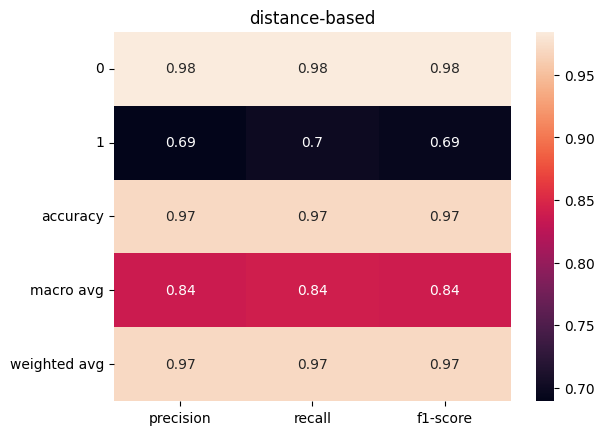

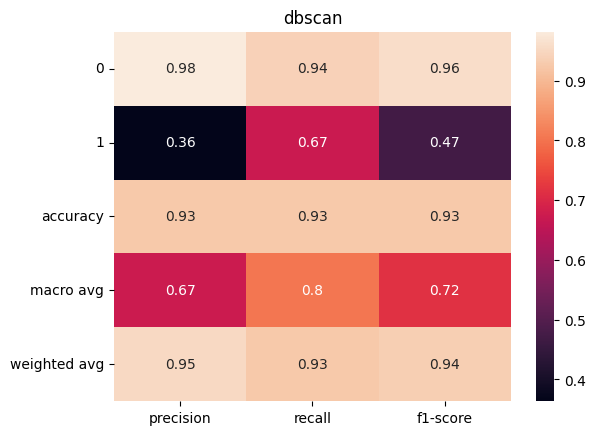

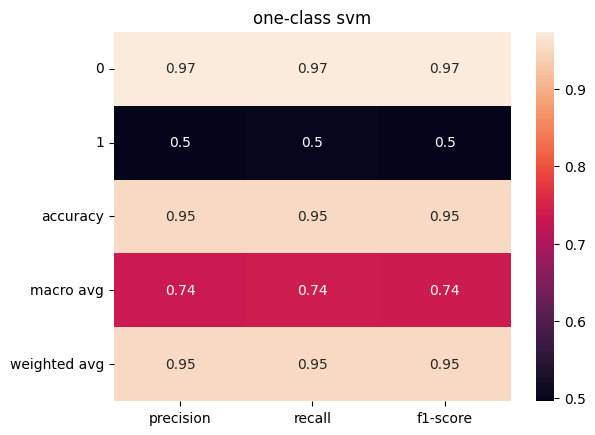

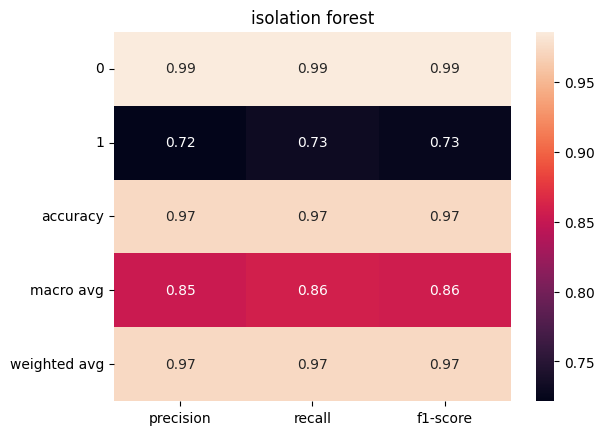

In [33]:
from sklearn.metrics import classification_report

for name, label in zip(names, labels):
    ax = plt.axes()

    cr = classification_report(y_true=y, y_pred=label, output_dict=True)
    sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True)

    ax.set_title(name)
    plt.show()

## Confusion matrix для всех моделей

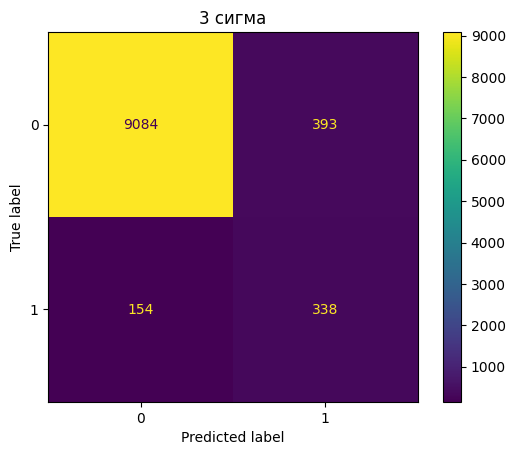

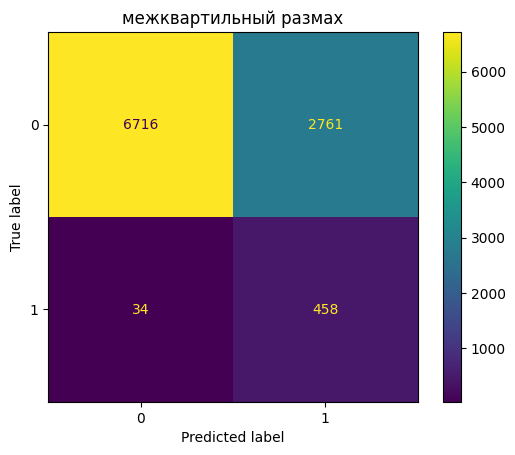

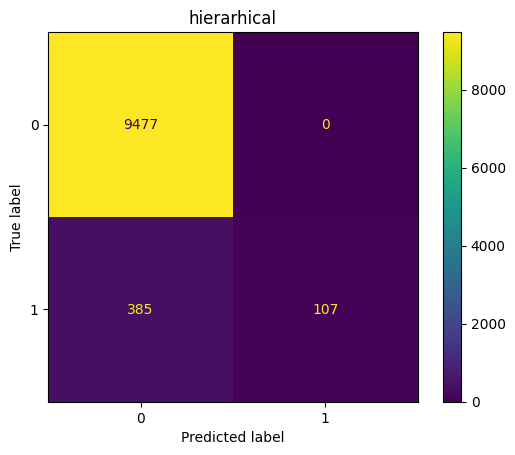

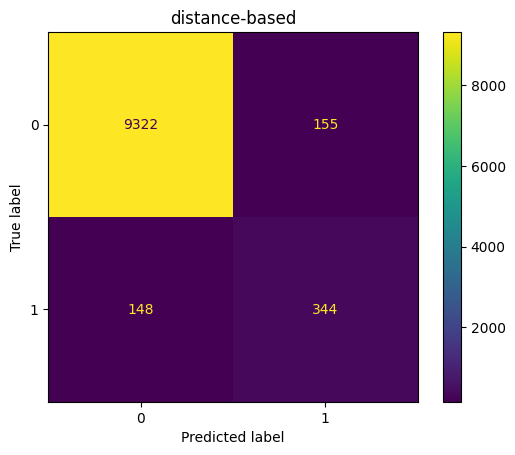

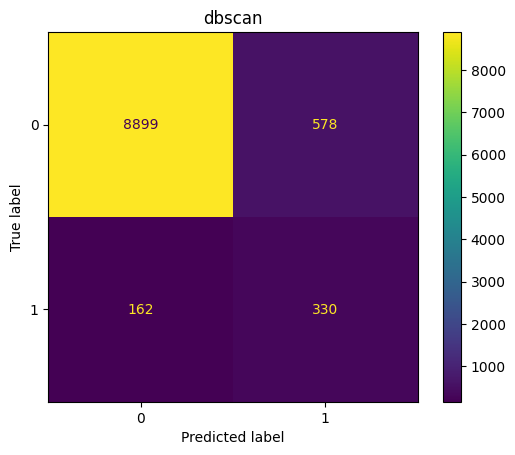

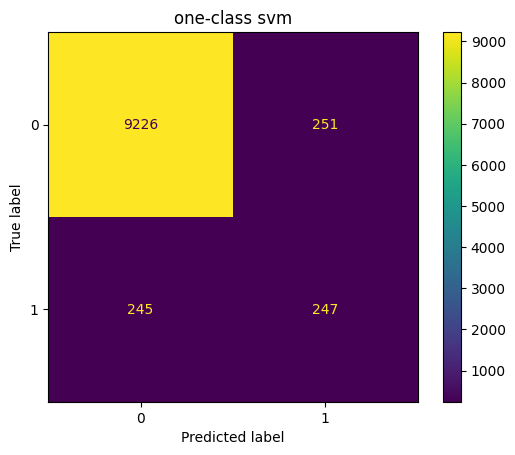

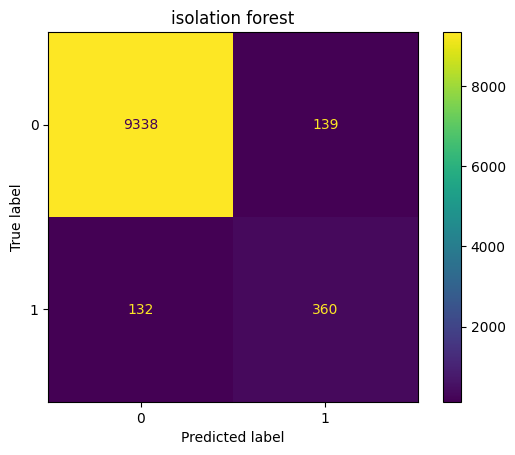

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, label in zip(names, labels):
    cm = confusion_matrix(y_true=y, y_pred=label)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title(name)
    plt.show()


## Сжатое представление для всех моделей

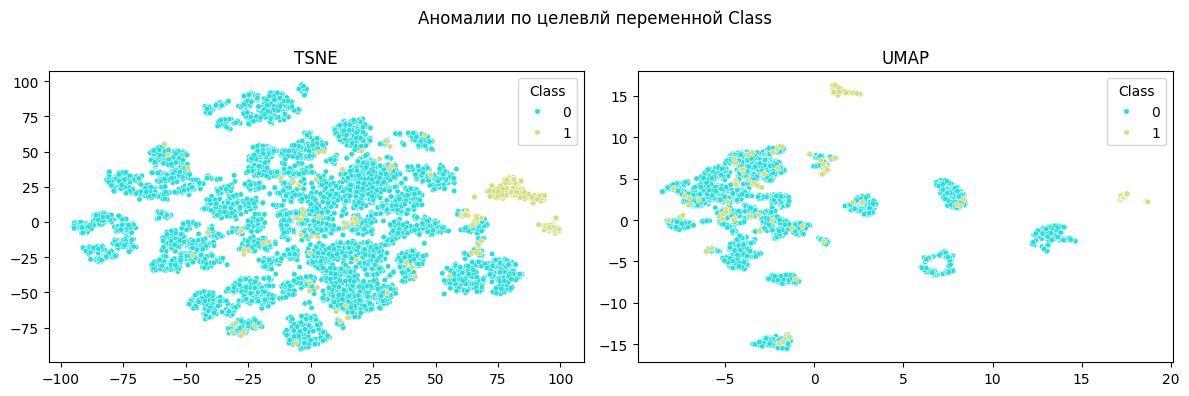

In [35]:
from sklearn.manifold import TSNE
import umap.umap_ as umap

tsne = TSNE(n_components=2, random_state=RANDOM_SEED)
X_tsne = tsne.fit_transform(X)

u = umap.UMAP(n_components=2, random_state=RANDOM_SEED)
X_umap = u.fit_transform(X)

plots_of_cluster(X_tsne, X_umap, title=f'Аномалии по целевлй переменной Class', hue=y)

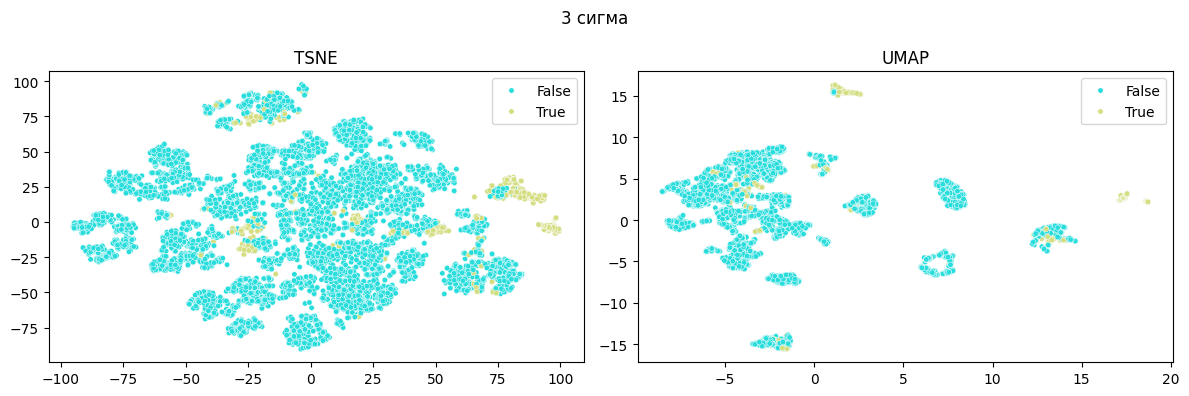

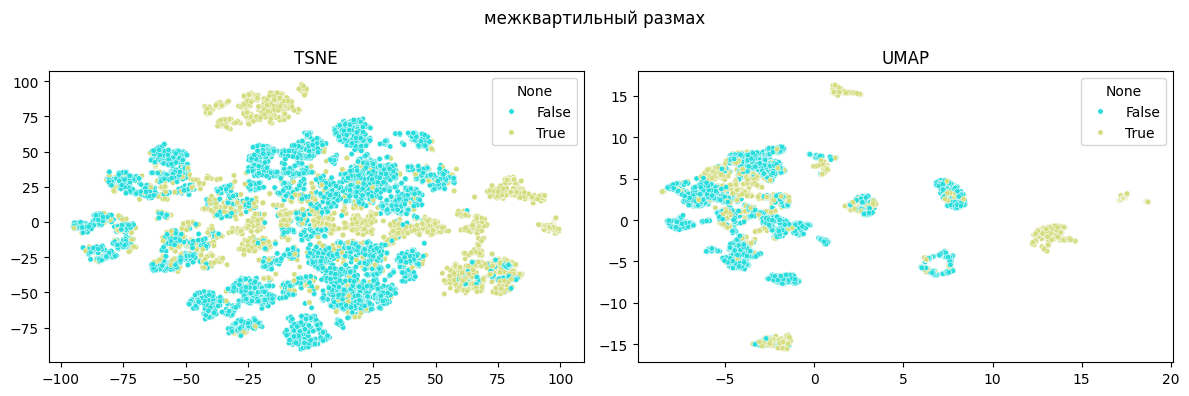

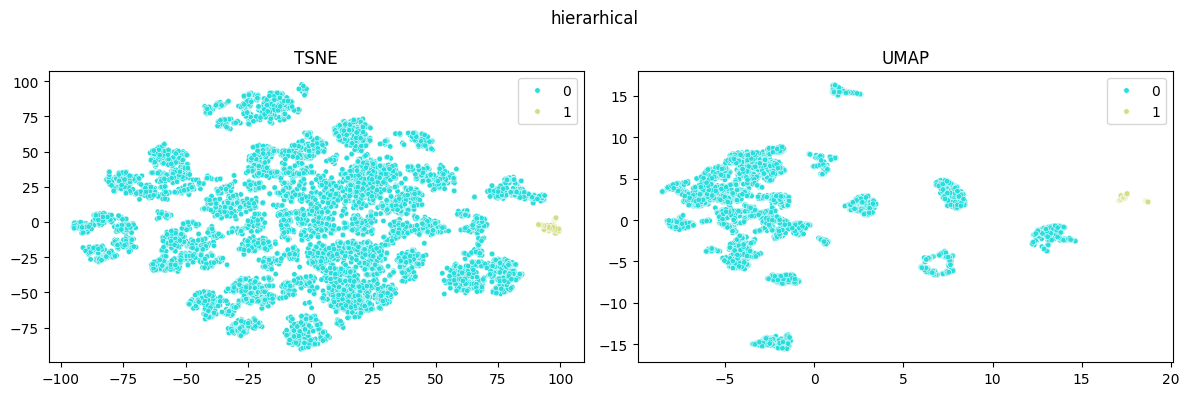

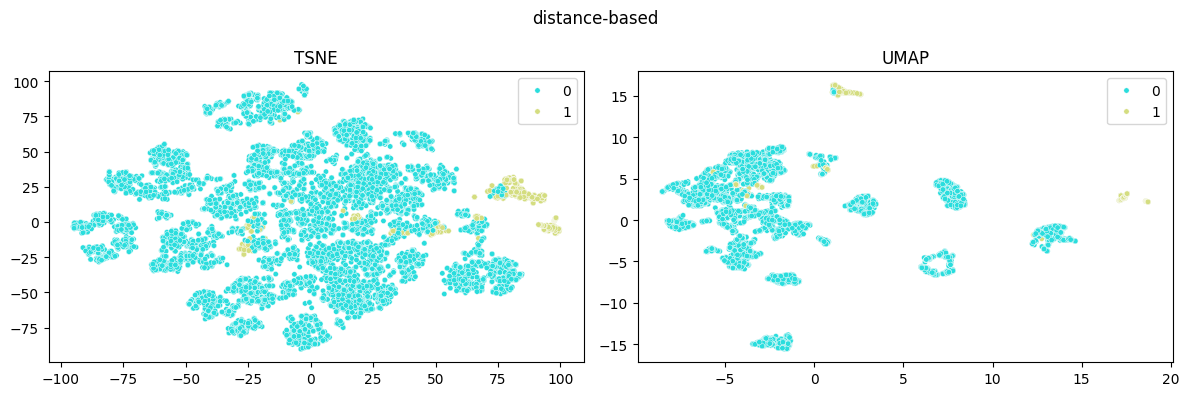

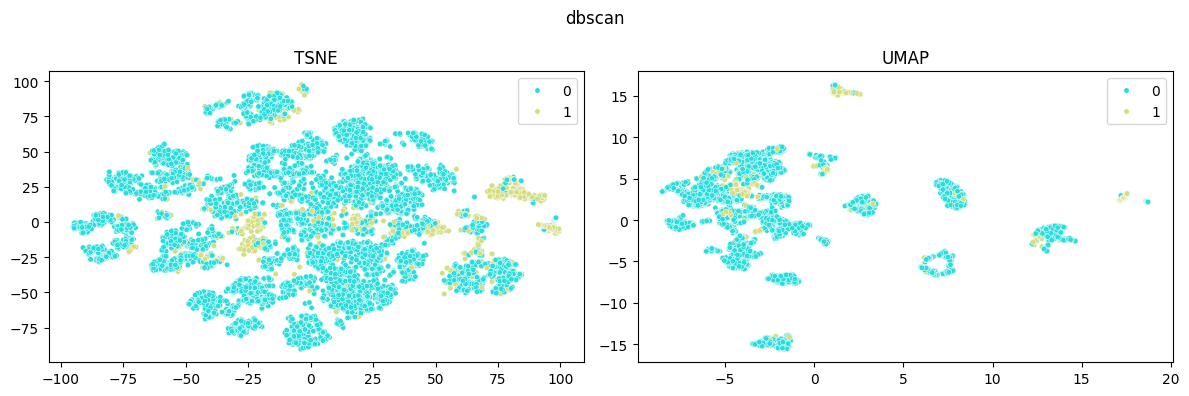

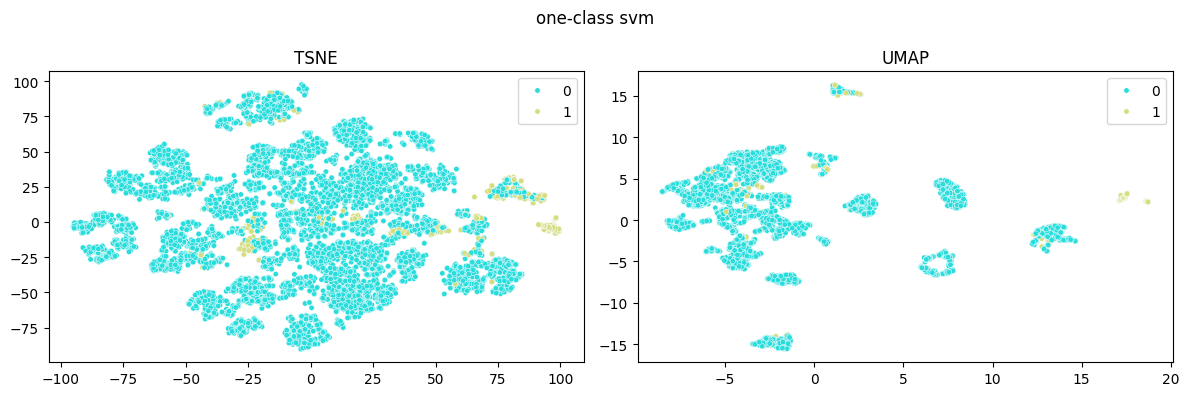

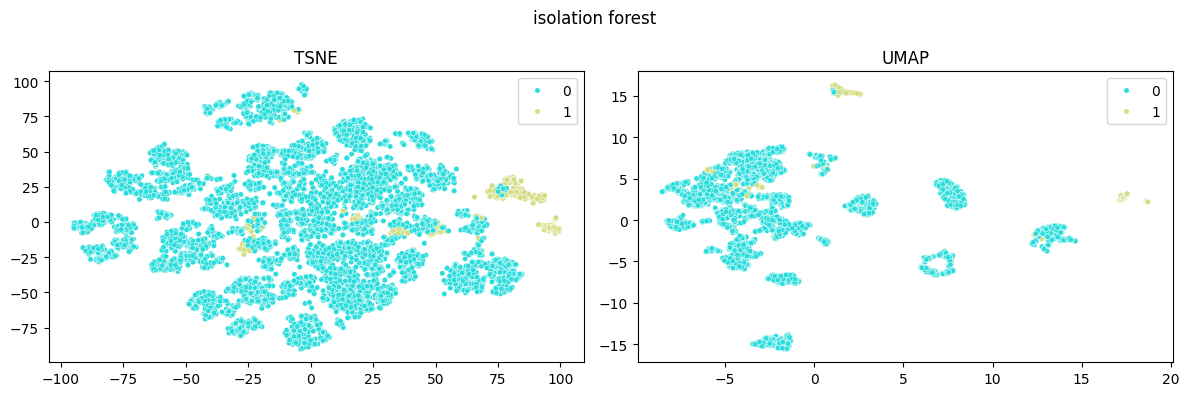

In [36]:
for name, label in zip(names, labels):
    plots_of_cluster(X_tsne, X_umap, title=name, hue=label)

Лучше всего себя показали isolation forest и евклидово расстояние.  
Так же хорошо себя показала ирархическая кластеризация. Ее precison составил 100 %, но recall 22 %